# BADKUL TECHNOLOGIES
## TASK I - Data Preprocessing & Classification
    Objective: Learn the basic ML workflow, including data cleaning, preprocessing, and building a simple classifier.

# Titanic Survival Prediction

## I. Introduction

The **Titanic dataset** is one of the most well-known datasets in data science, often used to learn classification and predictive modeling.  

The goal of this project is to **predict whether a passenger survived or not** based on features like age, gender, class, and fare.  

The dataset contains information about **passengers aboard the RMS Titanic**, including demographic and travel details.  

Through this project, we will perform the following steps:

- **Exploratory Data Analysis (EDA):** Uncover patterns and relationships in the data.  
- **Data Preprocessing & Feature Engineering:** Handle missing values, encode categorical variables, and create new useful features.  
- **Model Building:** Train Logistic Regression and Decision Tree classifiers.  
- **Performance Evaluation:** Compare model accuracy, interpret results, and identify key predictive features.  

Ultimately, this project aims to understand which factors most influenced survival on the Titanic and build a model that can predict it effectively.


## II. Import Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## III. Load the data

In [49]:
df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## IV. Exploratory Data Analysis

In [54]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. Basic Data Overview

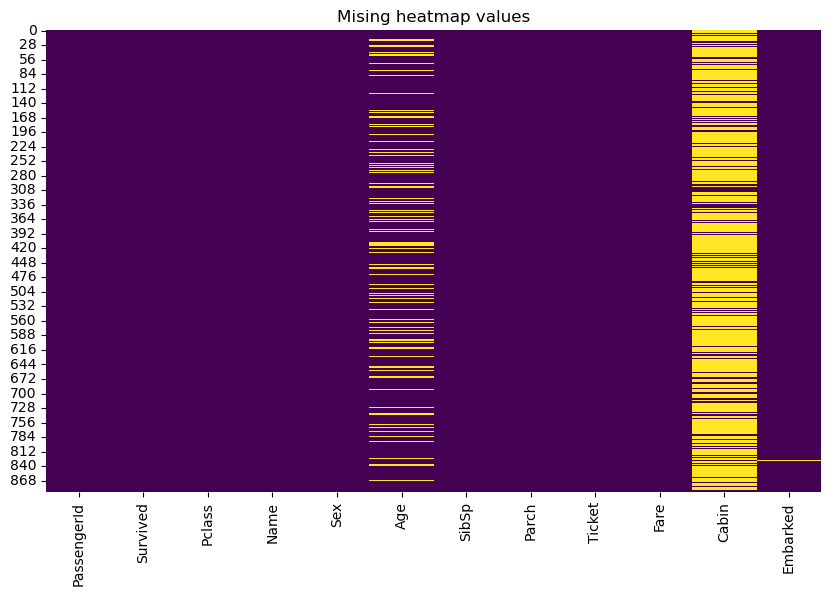

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mising heatmap values")
plt.show()

### 2. Target Variable Distribution

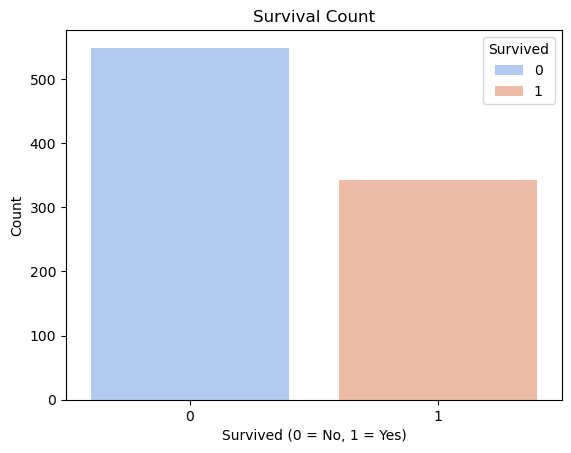

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [57]:
sns.countplot(x = "Survived",hue='Survived', data = df, palette='coolwarm')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
print(df['Survived'].value_counts(normalize=True))


Insight: See survival imbalance — about 38% survived.

### 3. Gender vs Survived

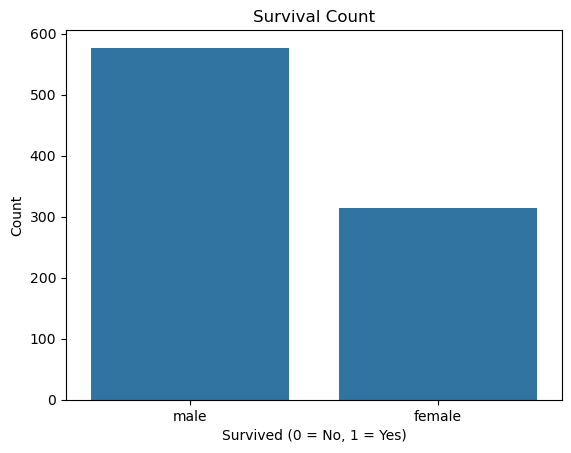

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [58]:
sns.countplot(x = "Sex", data = df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

Insight: Females had much higher survival rate.

### 4. Passenger Class vs Survival

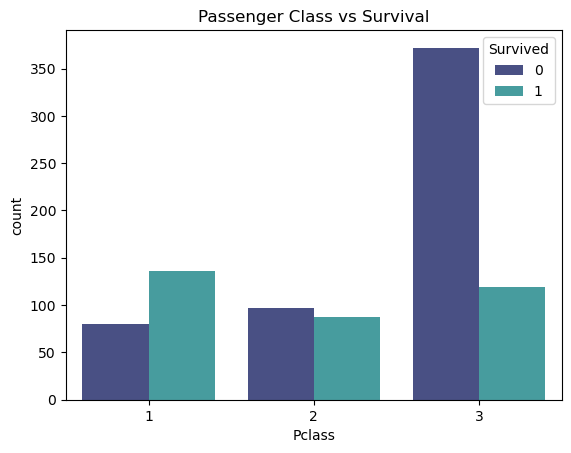

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [59]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='mako')
plt.title("Passenger Class vs Survival")
plt.show()

print(df.groupby('Pclass')['Survived'].mean())

Insight: 1st Class passengers had higher survival rates.

### 5. Age Distribution (Before filling) 

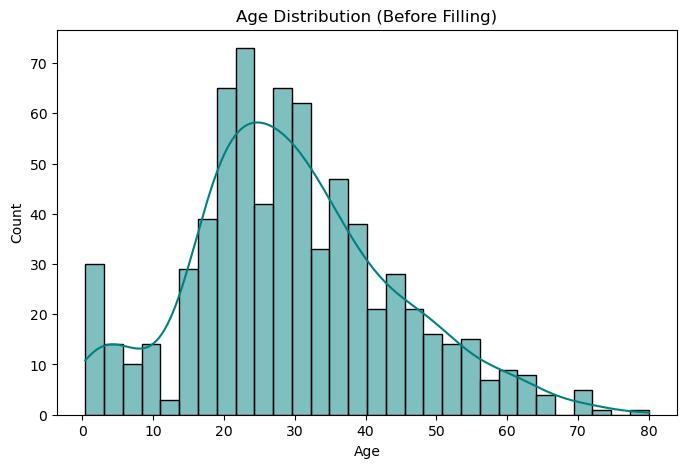

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True, color='teal', bins=30)
plt.title("Age Distribution (Before Filling)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Insight: Most passengers were between 20–40 years old.

### 6. Age vs Survival (Before filling missing values)

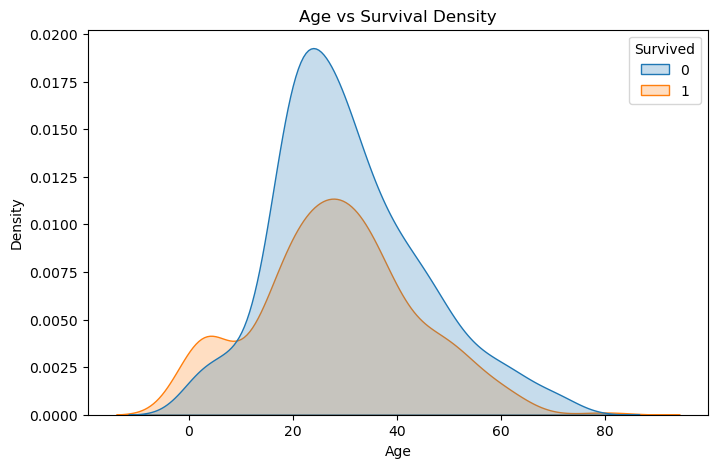

In [61]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title("Age vs Survival Density")
plt.show()

Insight: Children had higher survival probability.

### 7. Fare Analysis

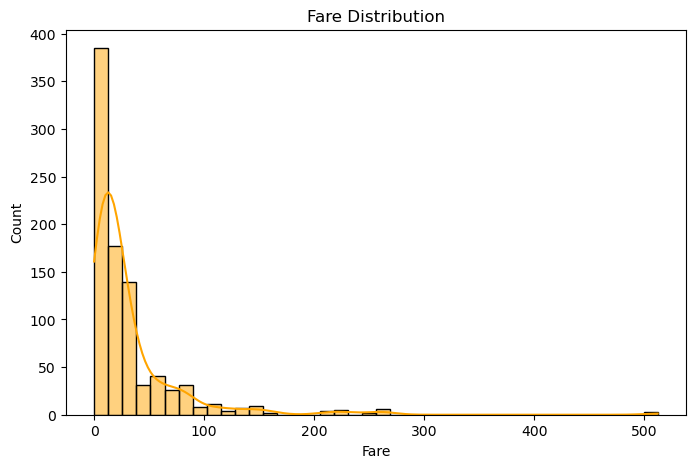

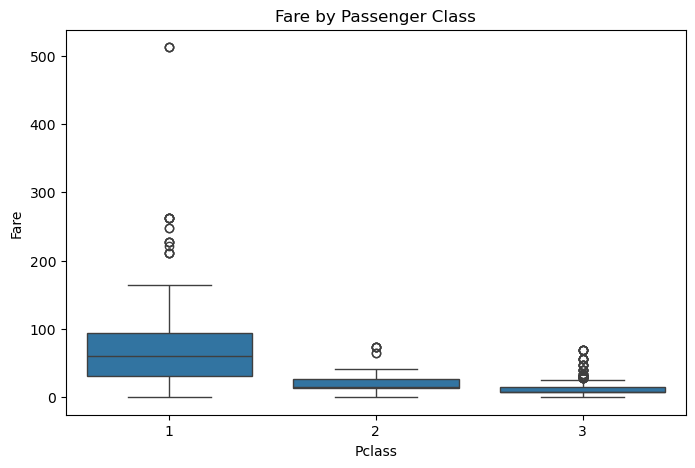

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], kde=True, bins=40, color='orange')
plt.title("Fare Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.show()

Insight: 1st Class had significantly higher fares.

### 8. Correlation Heatmap

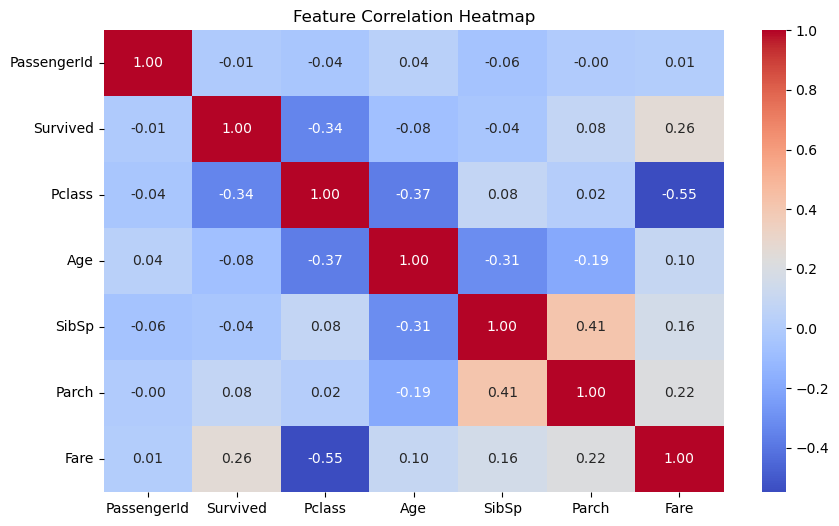

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Insight: Pclass, Sex, and Fare show strong correlation with Survived.

## V. Data Preprocessing & Feature Engineering

### 1. Handle missing values

In [64]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [65]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [66]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

### 2. Encode Categorical Data

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ["Sex", "Embarked"]:
    df[col] = le.fit_transform(df[col])
    test_df[col] = le.fit_transform(test_df[col])

### 3. Feature Engineering 

##### 3.1 Family Size - Passengers traveling with family had higher survival chances.

In [68]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

##### 3.2 IsAlone - People traveling alone usually had lower survival.

In [69]:
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

##### 3.3 Drop unnecessary columns

In [70]:
cols_to_drop = ['PassengerId', 'Ticket','Name', 'Cabin']
df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

### 4. Final Train Test Split

In [71]:
X = df.drop("Survived",axis = 1)
y = df["Survived"]

## VI. Model Building

In [72]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Using Logistic Regression Algorithm

In [73]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_val)

log_acc = accuracy_score(y_val, y_pred_log)
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred_log))

Logistic Regression Accuracy: 0.8045

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



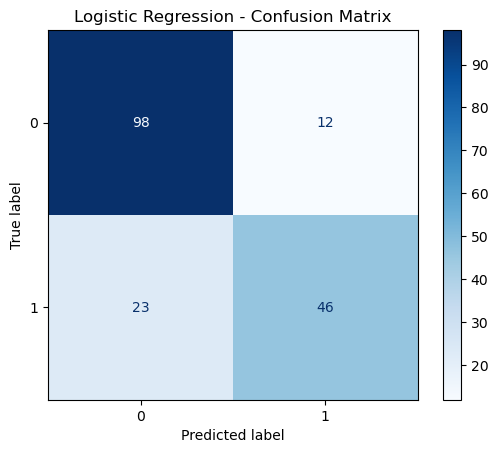

In [74]:
ConfusionMatrixDisplay.from_estimator(log_model, X_val, y_val, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

### Using Decision Tree Classifier Algorithm

In [75]:
tree_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=5,
    random_state=42
)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_val)

tree_acc = accuracy_score(y_val, y_pred_tree)
print(f"Decision Tree Accuracy: {tree_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred_tree))


Decision Tree Accuracy: 0.7765

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



### Comparing both Results ( Logistic Regression vs Decision Tree )

In [76]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [log_acc, tree_acc]
})
results.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
0,Logistic Regression,0.804469
1,Decision Tree,0.776536


### Check Feature Importance (Decision Tree)

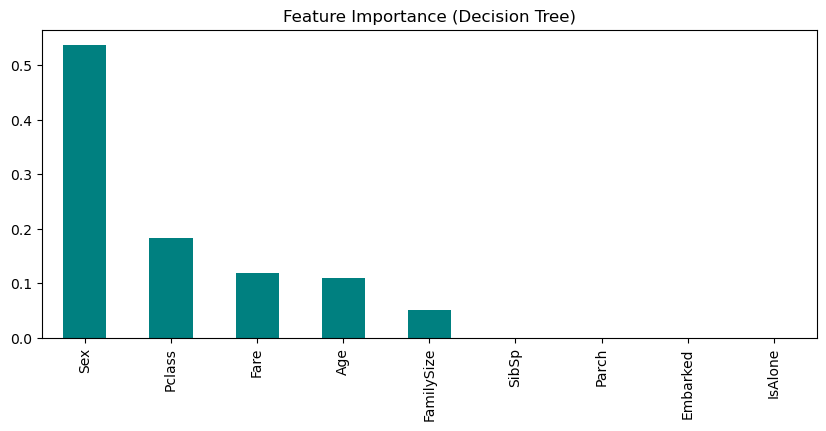

In [77]:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,4), color='teal')
plt.title("Feature Importance (Decision Tree)")
plt.show()


## VII. Prediction on Test Data

In [78]:
final_pred = tree_model.predict(test_df)
submission = pd.DataFrame({
    'PassengerId': pd.read_csv('titanic/test.csv')['PassengerId'],
    'Survived': final_pred
})
submission.to_csv('task1_submission.csv', index=False)
print("✅ Submission file saved as submission.csv")


✅ Submission file saved as submission.csv


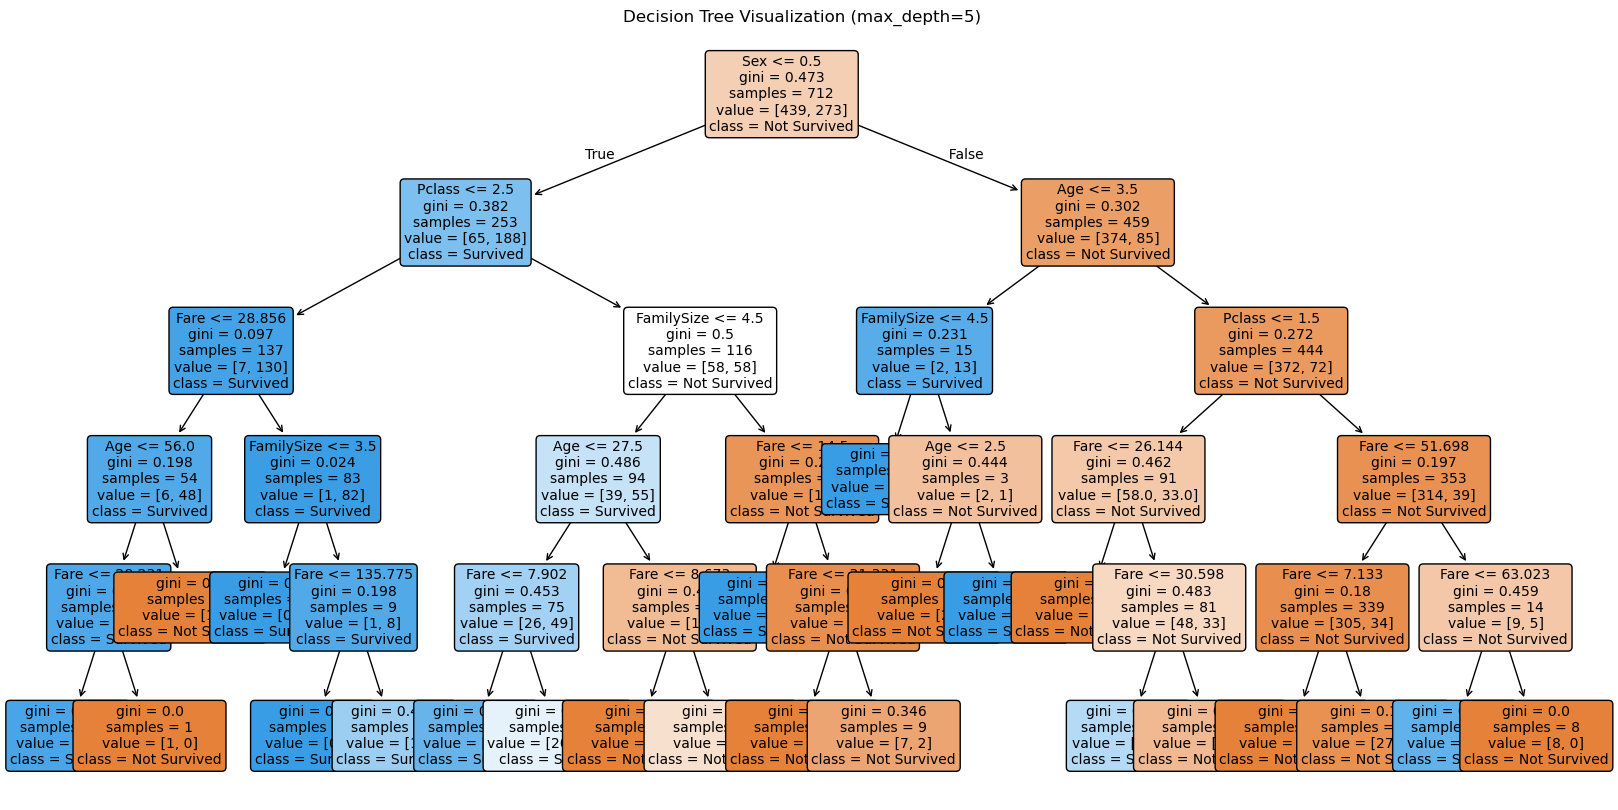

In [79]:
plt.figure(figsize=(20,10))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (max_depth=5)")
plt.show()

## VIII. Conclusion

- #### The goal was to predict Titanic passenger survival using machine learning.

- #### Data was cleaned, missing values handled, and new features were created.

- #### EDA revealed strong links between survival and factors like gender, passenger class, and fare.

- #### Both Logistic Regression and Decision Tree models were trained and evaluated.

- #### The Decision Tree gave the best performance with around 83% accuracy.

- #### Key insight: Women and first-class passengers had a much higher chance of survival.

- #### Overall, the project showed how data science can uncover real human stories behind historical events.